In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import astropy
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt

from astropy.cosmology import Planck18
cosmo = Planck18

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
wdir = '/anvil/scratch/x-mho1/cmass-ili'

In [7]:
# Load observations
from cmass.survey.tools import sky_to_xyz


def load_fits(fname, fields):
    with fits.open(fname) as hdul:
        gals = np.array([hdul[1].data[x] for x in fields]).T
        gals = pd.DataFrame(gals, columns=fields)
    return gals


zlim = 0.4, 0.7
fields = ['RA', 'DEC', 'Z', 'WEIGHT_SYSTOT', 'WEIGHT_NOZ', 'WEIGHT_CP']

# Load NGC
fname = join(wdir, 'obs/galaxy_DR12v5_CMASS_North.fits')
cmass = load_fits(fname, fields)
nrdz = cmass[['RA', 'DEC', 'Z']].values
mask = (nrdz[:, 2] > zlim[0]) & (nrdz[:, 2] < zlim[1])
nrdz = nrdz[mask]

# Load SGC
fname = join(wdir, 'obs/galaxy_DR12v5_CMASS_South.fits')
cmass = load_fits(fname, fields)
srdz = cmass[['RA', 'DEC', 'Z']].values
mask = (srdz[:, 2] > zlim[0]) & (srdz[:, 2] < zlim[1])
srdz = srdz[mask]

print(len(nrdz), len(srdz))

579089 213205


In [8]:
Nzbins = 10
zbin_edges = np.linspace(zlim[0], zlim[1], Nzbins + 1)
zbin_centers = 0.5 * (zbin_edges[:-1] + zbin_edges[1:])

shist = np.histogram(srdz[:, 2], bins=zbin_edges)[0]
nhist = np.histogram(nrdz[:, 2], bins=zbin_edges)[0]

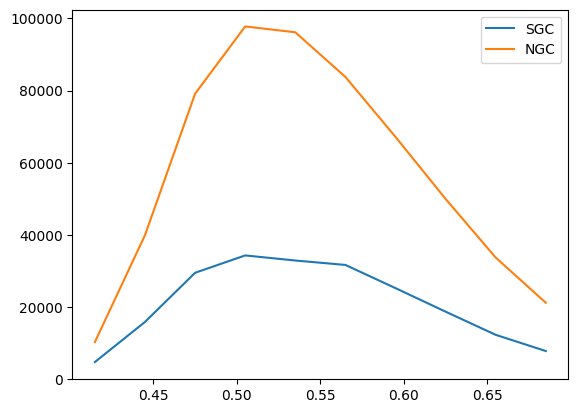

In [10]:
f, ax = plt.subplots()
ax.plot(zbin_centers, shist, label='SGC')
ax.plot(zbin_centers, nhist, label='NGC')
ax.set_ylim(0)
ax.legend()

In [ ]:
# Define the output directory
outdir = '/home/x-mho1/git/ltu-cmass/cmass/lightcone'

# Save shist
shist_filename = join(
    outdir, f'nz_DR12v5_CMASS_South_zmin{zlim[0]:.4f}_zmax{zlim[1]:.4f}.dat')
with open(shist_filename, 'w') as f:
    f.write('\n'.join(map(str, shist)))

# Save nhist
nhist_filename = join(
    outdir, f'nz_DR12v5_CMASS_North_zmin{zlim[0]:.4f}_zmax{zlim[1]:.4f}.dat')
with open(nhist_filename, 'w') as f:
    f.write('\n'.join(map(str, nhist)))